# Context of Data

**Company - UK-based and registered non-store online retail**

 **Products for selling - Mainly all-occasion gifts**

**Customers - Most are wholesalers (local or international)**

**Transactions Period - 1st Dec 2010 - 9th Dec 2011 (One year)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

import gc
import datetime

%matplotlib inline

In [2]:
cd ..

D:\Python_Project


In [3]:
cd Assignment 2

D:\Python_Project\Assignment 2


In [4]:
ls

 Volume in drive D has no label.
 Volume Serial Number is 06DA-8863

 Directory of D:\Python_Project\Assignment 2

04/24/2022  12:12 AM    <DIR>          .
04/24/2022  12:12 AM    <DIR>          ..
04/23/2022  07:07 PM    <DIR>          .ipynb_checkpoints
04/24/2022  12:12 AM           179,669 E-Commerce - EDA - Python Project 2 .ipynb
04/23/2022  07:28 PM        45,580,638 Ecommerce_UK_Retailer.csv
04/23/2022  07:28 PM        23,041,022 Ecommerce_UK_Retailer.xlsx
05/17/2020  11:01 AM           712,134 E-Commerce-EDA-Python Project 2.pdf
               4 File(s)     69,513,463 bytes
               3 Dir(s)  240,204,251,136 bytes free


In [5]:
df = pd.read_excel('Ecommerce_UK_Retailer.xlsx')

In [6]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


# 1. Perform Basic EDA 

**a. Boxplot – All Numeric Variables**

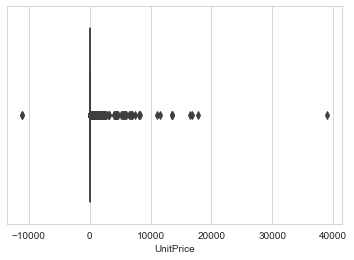

In [8]:
sns.boxplot(df['UnitPrice']);

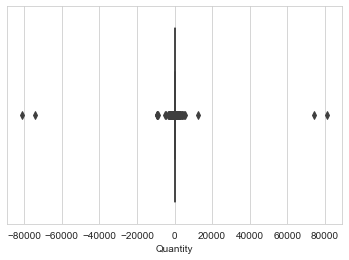

In [9]:
sns.boxplot(df['Quantity']);

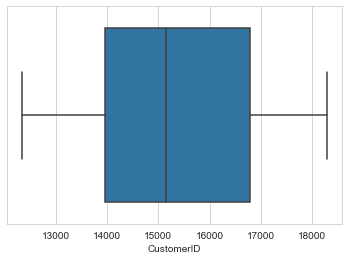

In [10]:
sns.boxplot(df['CustomerID']);

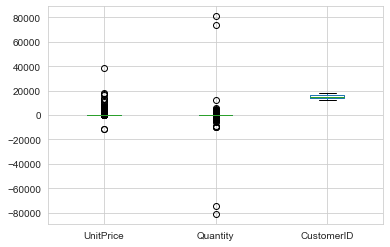

In [11]:
df.boxplot(column=['UnitPrice','Quantity','CustomerID']);

**b. Histogram – All Numeric Variables**

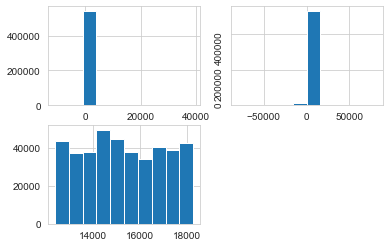

In [38]:
plt.subplot(2,2,1)
plt.hist(df["UnitPrice"])
plt.show;
plt.subplot(2,2,2)
plt.hist(df["Quantity"])
plt.yticks(rotation=90)
plt.show;
plt.subplot(2,2,3)
plt.hist(df["CustomerID"])
plt.show;

**c. Distribution Plot – All Numeric Variables**

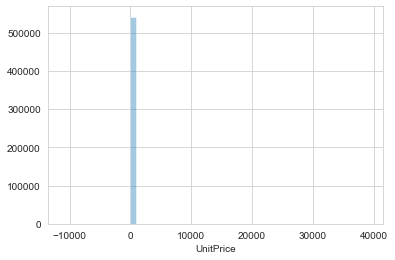

In [12]:
sns.distplot(df.UnitPrice, kde=False);

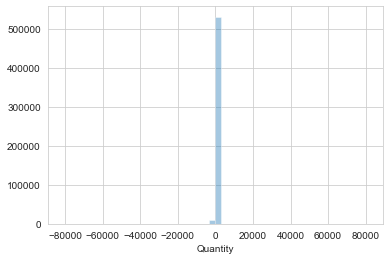

In [13]:
sns.distplot(df.Quantity, kde=False);

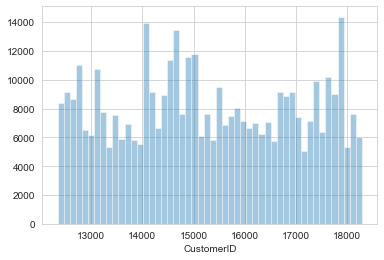

In [14]:
sns.distplot(df.CustomerID, kde=False);

**d. Aggregation for all numerical Columns**

In [45]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [15]:
x=df[['UnitPrice','Quantity','CustomerID']]

In [16]:
x.head()

,UnitPrice,Quantity,CustomerID
0,2.55,6,17850.0
1,3.39,6,17850.0
2,2.75,8,17850.0
3,3.39,6,17850.0
4,3.39,6,17850.0


In [17]:
x.sum()

UnitPrice     2.498804e+06
Quantity      5.176450e+06
CustomerID    6.219476e+09
dtype: float64

In [18]:
x.mean()

UnitPrice         4.611114
Quantity          9.552250
CustomerID    15287.690570
dtype: float64

In [19]:
x.median()

UnitPrice         2.08
Quantity          3.00
CustomerID    15152.00
dtype: float64

In [20]:
x.std()

UnitPrice       96.759853
Quantity       218.081158
CustomerID    1713.600303
dtype: float64

In [21]:
x.max()

UnitPrice     38970.0
Quantity      80995.0
CustomerID    18287.0
dtype: float64

In [22]:
x.min()

UnitPrice    -11062.06
Quantity     -80995.00
CustomerID    12346.00
dtype: float64

**e. Unique Values across all columns**

In [54]:
for col in df:
    print(df[col].unique())

[536365 536366 536367 ... 581585 581586 581587]
['85123A' 71053 '84406B' ... '90214U' '47591b' 23843]
['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'lost'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']
[     6      8      2     32      3      4     24     12     48     18
     20     36     80     64     10    120     96     23      5      1
     -1     50     40    100    192    432    144    288    -12    -24
     16      9    128     25     30     28      7     56     72    200
    600    480     -6     14     -2     11     33     13     -4     -5
     -7     -3     70    252     60    216    384    -10     27     15
     22     19     17     21     34     47    108     52  -9360    -38
     75    270     42    240     90    320   1824    204     69    -36
   -192   -144    160   2880   1400     39    -48    -50     26   1440
     31     82     78     97     98     35     57    -20    110    -22
    -30    -70

In [32]:
df.count(axis=0)

InvoiceNo      541909
StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
dtype: int64

In [56]:
df.nunique(axis=0)

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

**f. Duplicate values across all columns**

In [33]:
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [34]:
df.shape

(541909, 8)

In [35]:
df=df.drop_duplicates(keep=False)

In [36]:
df.shape

(531762, 8)

In [61]:
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


**g. Correlation – Heatmap - All Numeric Variables**

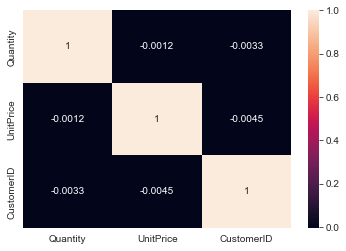

In [62]:
df.corr()
sns.heatmap(df.corr(),annot=True);

**h. Regression Plot - All Numeric Variables**

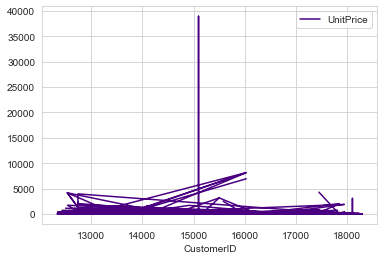

In [65]:
df.plot(x='CustomerID',y='UnitPrice',color='indigo');

**i. Bar Plot – Every Categorical Variable vs every Numerical Variable**

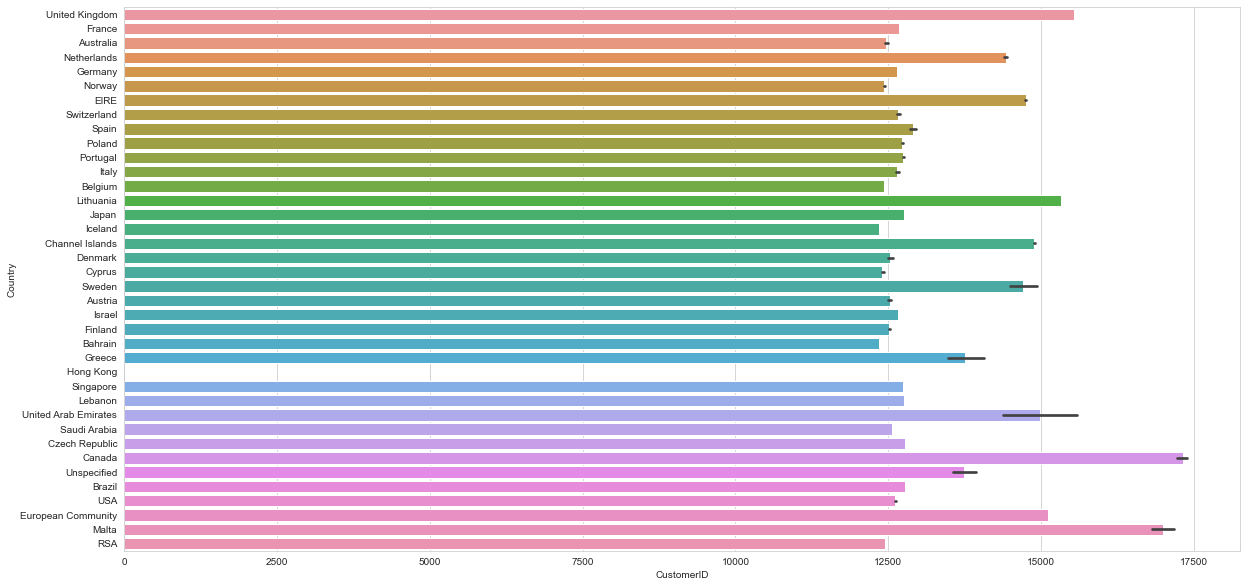

In [68]:
plt.subplots(figsize=(20,10))
sns.barplot(x='CustomerID',y='Country',data=df);

**j. Pair plot - All Numeric Variables**

In [69]:
df.describe().columns

Index(['Quantity', 'UnitPrice', 'CustomerID'], dtype='object')

In [ ]:
sns.pairplot(data=df,vars=['Quantity','UnitPrice','CustomerID'])
plt.show()

**k. Line chart to show the trend of data - All Numeric/Date Variables**

In [ ]:
df.plot('x=CustomerID')
plt.show()

**l. Plot the skewness - All Numeric Variables**

skewness: 0.029835


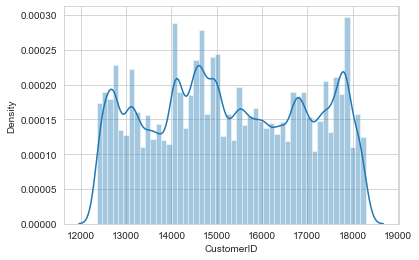

In [24]:
sns.distplot(df['CustomerID']);
print('skewness: %f' % df['CustomerID'].skew())

# 2. Check for missing values in all columns and replace them with the appropriate metric (Mean/Median/Mode) 

In [26]:
df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

<AxesSubplot:xlabel='CustomerID'>

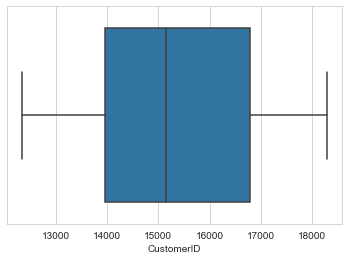

In [27]:
sns.boxplot(df['CustomerID'])

<AxesSubplot:xlabel='CustomerID', ylabel='Density'>

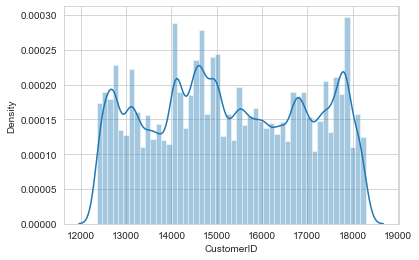

In [28]:
sns.distplot(df['CustomerID'])

As data distribution is symmetric the appropriate metric is mean.We have to replace missing values with mean.

In [37]:
x=df['CustomerID'].mean()

In [38]:
type(x)

float

In [39]:
int(x)

15275

In [40]:
df['CustomerID']=df['CustomerID'].fillna(x)

In [41]:
df.isnull().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64

In [42]:
df.dropna(inplace=True)

In [43]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

**3. Remove duplicate rows**

In [44]:
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


**4. Remove rows which have negative values in Quantity column**

In [46]:
(df['Quantity']<0).sum()

9693

In [47]:
df.drop(df[df['Quantity']<0].index,inplace=True)

In [49]:
df.shape

(520615, 8)

**5. Add the columns - Month, Day and Hour for the invoice**

In [51]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [52]:
import datetime as dt

In [53]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [55]:
df['InvoiceDate'] = pd.to_datetime(df.InvoiceDate, format='%m/%d/%Y %H:%M')

In [58]:
df.insert(loc=2, column='Year_month', value=df['InvoiceDate'].map(lambda x: 100*x.year + x.month))
df.insert(loc=3, column='Month', value=df.InvoiceDate.dt.month)
# +1 to make Monday=1.....Sunday=7
df.insert(loc=4, column='Day', value=(df.InvoiceDate.dt.dayofweek)+1)
df.insert(loc=5, column='Hour', value=df.InvoiceDate.dt.hour)


ValueError: cannot insert Year_month, already exists

In [59]:
df.head()

,InvoiceNo,StockCode,Year_month,Month,Day,Hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,201012,12,3,8,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,201012,12,3,8,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,201012,12,3,8,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,201012,12,3,8,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,201012,12,3,8,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# 6. How many orders made by the customers?

In [61]:
df.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count().head()

,CustomerID,Country,InvoiceNo
0,12346.0,United Kingdom,1
1,12347.0,Iceland,182
2,12348.0,Finland,31
3,12349.0,Italy,73
4,12350.0,Norway,17


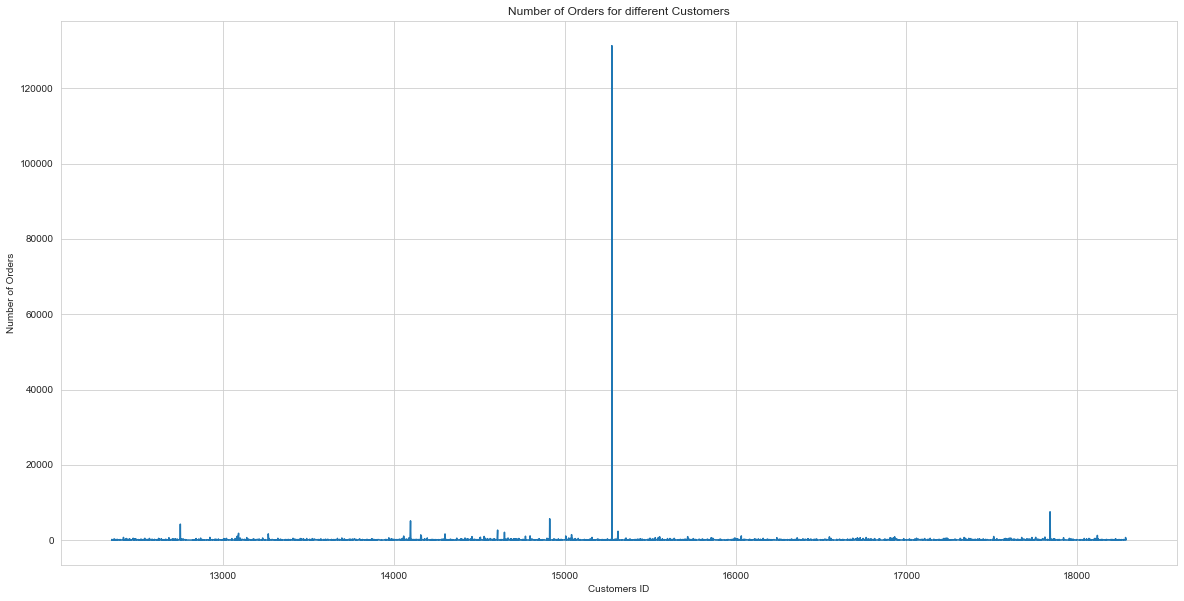

In [63]:
orders = df.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count()
plt.subplots(figsize=(20,10))
plt.plot(orders.CustomerID, orders.InvoiceNo)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

# 7. TOP 5 customers with higher number of orders

In [65]:
orders['CustomerID']=orders['CustomerID'].astype('int64')

In [67]:
orders.sort_values(by='InvoiceNo', ascending=False).head()

,CustomerID,Country,InvoiceNo
2169,15275,United Kingdom,131300
4028,17841,United Kingdom,7523
1888,14911,EIRE,5667
1298,14096,United Kingdom,5111
334,12748,United Kingdom,4243


# 8. How much money spent by the customers?

In [72]:
df['Amount_Spent']=df['Quantity']*df['UnitPrice']

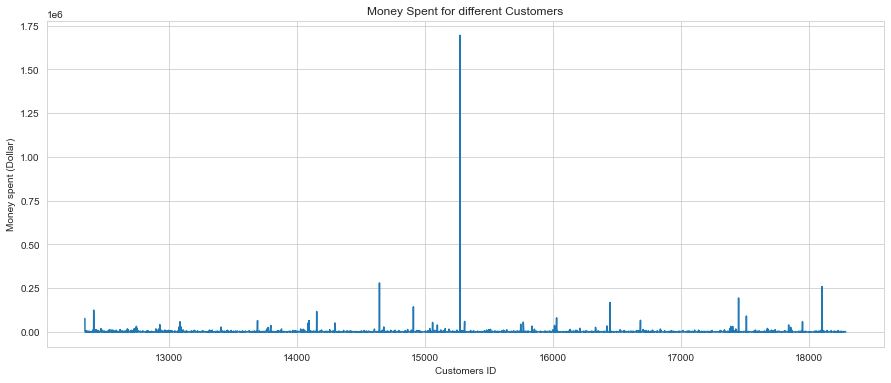

In [73]:
money_spent = df.groupby(by=['CustomerID','Country'], as_index=False)['Amount_Spent'].sum()

plt.subplots(figsize=(15,6))
plt.plot(money_spent.CustomerID, money_spent.Amount_Spent)
plt.xlabel('Customers ID')
plt.ylabel('Money spent (Dollar)')
plt.title('Money Spent for different Customers')
plt.show()

In [77]:
df.head()

,InvoiceNo,StockCode,Year_month,Month,Day,Hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount_Spent
0,536365,85123A,201012,12,3,8,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,201012,12,3,8,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,201012,12,3,8,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,201012,12,3,8,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,201012,12,3,8,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


# 9. TOP 5 customers with highest money spent

In [78]:
money_spent.sort_values(by='Amount_Spent',ascending=False).head()

,CustomerID,Country,Amount_Spent
2169,15275.108517,United Kingdom,1694485.90
1698,14646.000000,Netherlands,280206.02
4219,18102.000000,United Kingdom,259657.30
3746,17450.000000,United Kingdom,194230.79
3026,16446.000000,United Kingdom,168472.50


# 10. How many orders per month?

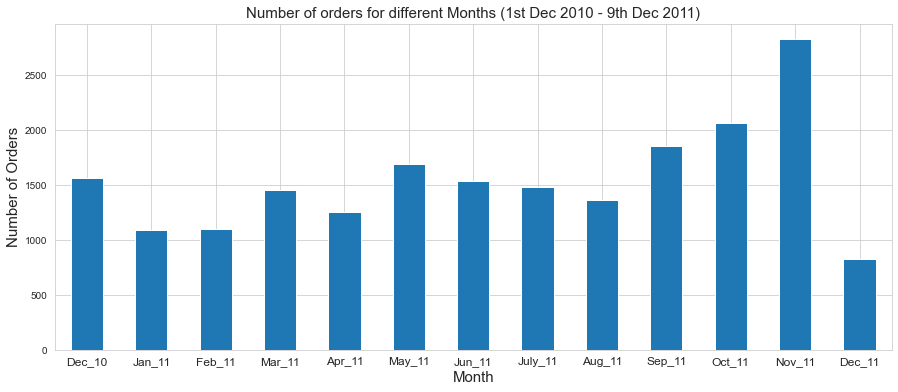

In [82]:
ax = df.groupby('InvoiceNo')['Year_month'].unique().value_counts().sort_index().plot(kind='bar',figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Months (1st Dec 2010 - 9th Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=12)
plt.show()

In [99]:
ax=df.groupby('InvoiceNo')['Year_month'].unique().value_counts().sort_index()

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 520615 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     520615 non-null  object        
 1   StockCode     520615 non-null  object        
 2   Year_month    520615 non-null  int64         
 3   Month         520615 non-null  int64         
 4   Day           520615 non-null  int64         
 5   Hour          520615 non-null  int64         
 6   Description   520615 non-null  object        
 7   Quantity      520615 non-null  int64         
 8   InvoiceDate   520615 non-null  datetime64[ns]
 9   UnitPrice     520615 non-null  float64       
 10  CustomerID    520615 non-null  float64       
 11  Country       520615 non-null  object        
 12  Amount_Spent  520615 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(5), object(4)
memory usage: 55.6+ MB


# 11. How many orders per day?

In [89]:
ax=df.groupby('InvoiceNo')['Day'].value_counts()

In [90]:
ax

InvoiceNo  Day
536365     3       7
536366     3       2
536367     3      12
536368     3       4
536369     3       1
                  ..
581586     5       4
581587     5      15
A563185    5       1
A563186    5       1
A563187    5       1
Name: Day, Length: 20134, dtype: int64

In [92]:
ax=df.groupby('InvoiceNo')['Day'].unique().value_counts()

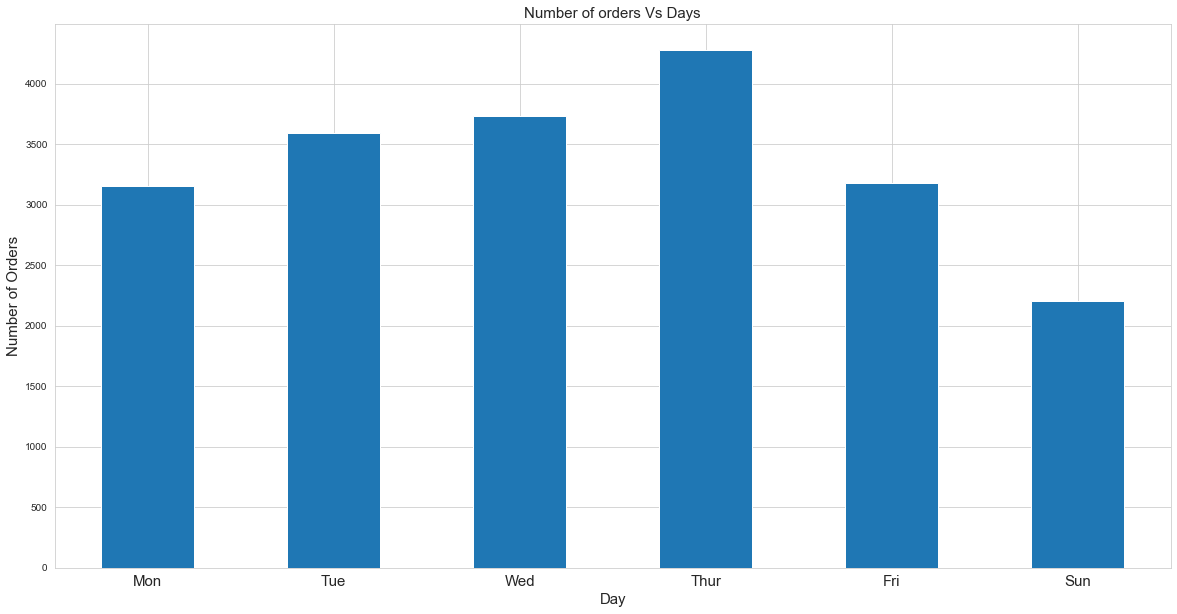

In [94]:
ax=df.groupby('InvoiceNo')['Day'].unique().value_counts().sort_index().plot(kind='bar',figsize=(20,10))
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders Vs Days',fontsize=15)
ax.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'),rotation='horizontal', fontsize=15)
plt.show()

# 12. How many orders per hour?

In [95]:
a=df['Hour'].value_counts().sort_index()

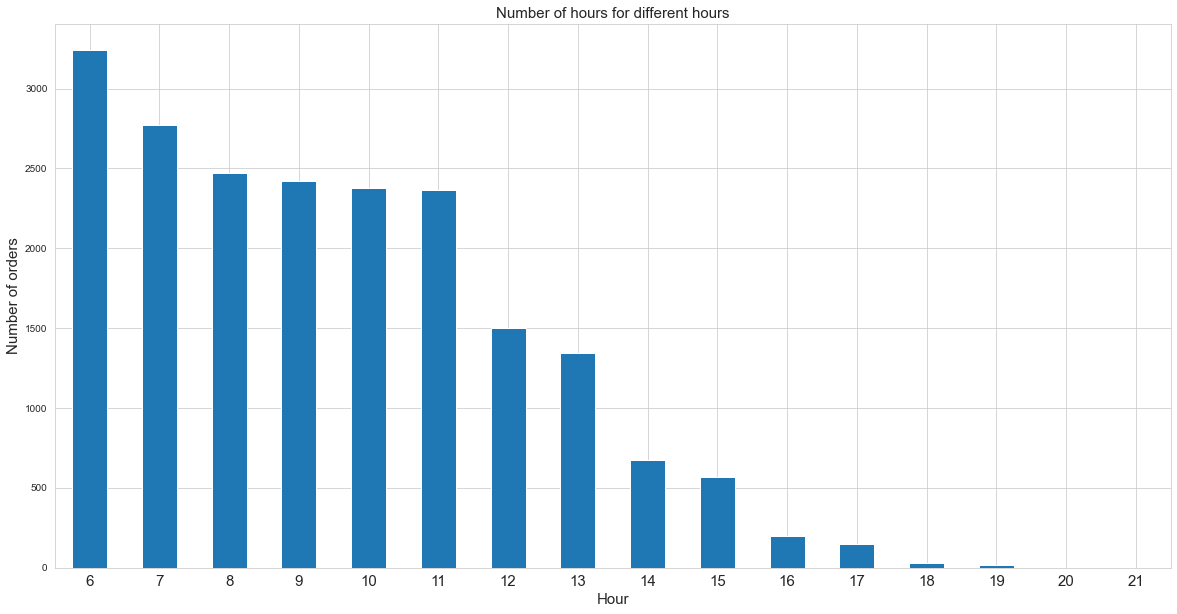

In [96]:
ax=df.groupby('InvoiceNo')['Hour'].unique().value_counts().plot(kind='bar',figsize=(20,10))
ax.set_xlabel('Hour',fontsize=15)
ax.set_ylabel('Number of orders',fontsize=15)
ax.set_title('Number of hours for different hours',fontsize=15)
ax.set_xticklabels(range(6,22),rotation='horizontal',fontsize=15)
plt.show()

# 13. How many orders for each country?

In [101]:
country_orders=df.groupby('Country')['InvoiceNo'].count().sort_values()
country_orders

Country
Saudi Arabia                 9
Bahrain                     18
Czech Republic              25
Brazil                      32
Lithuania                   35
Lebanon                     45
RSA                         58
European Community          60
United Arab Emirates        68
Malta                      112
Greece                     145
Canada                     151
USA                        179
Iceland                    182
Singapore                  222
Hong Kong                  276
Israel                     289
Japan                      321
Poland                     330
Denmark                    380
Austria                    398
Unspecified                438
Sweden                     449
Cyprus                     593
Finland                    685
Channel Islands            746
Italy                      758
Norway                    1072
Australia                 1183
Portugal                  1484
Switzerland               1951
Belgium                   2031


# 14. Orders trend across months

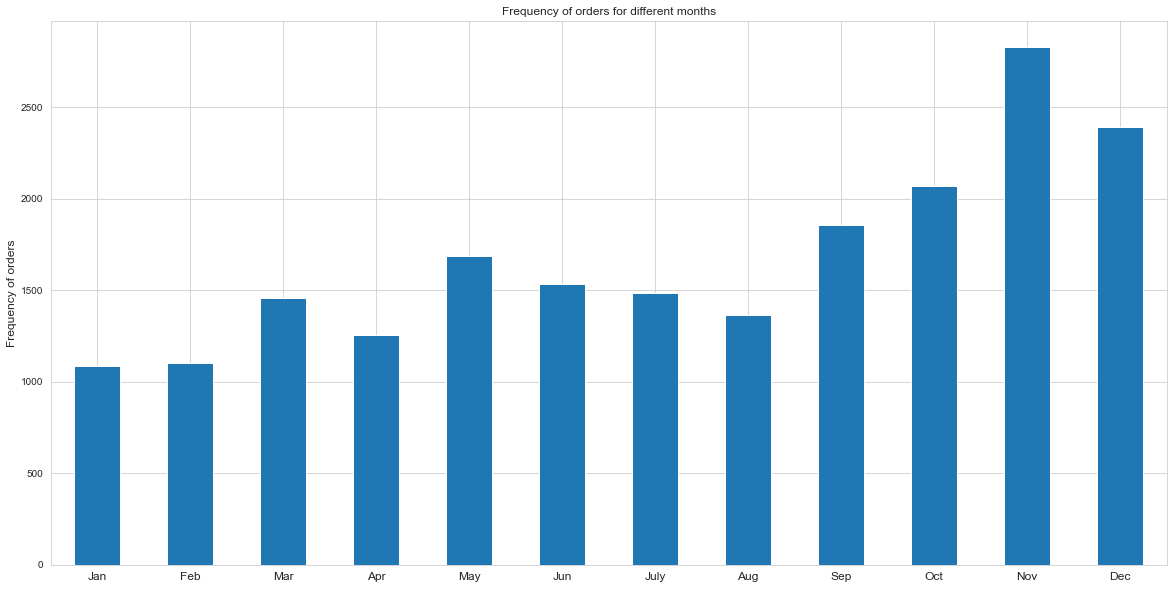

In [104]:
om=df.groupby('InvoiceNo')['Month'].unique().value_counts().sort_index().plot(kind='bar',figsize=(20,10))

om.set_ylabel('Frequency of orders',fontsize=12)
om.set_title('Frequency of orders for different months',fontsize=12)
om.set_xticklabels(('Jan','Feb','Mar','Apr','May','Jun','July','Aug','Sep','Oct','Nov','Dec'), rotation='horizontal', fontsize=12)
plt.show()

# 15. How much money spent by each country?

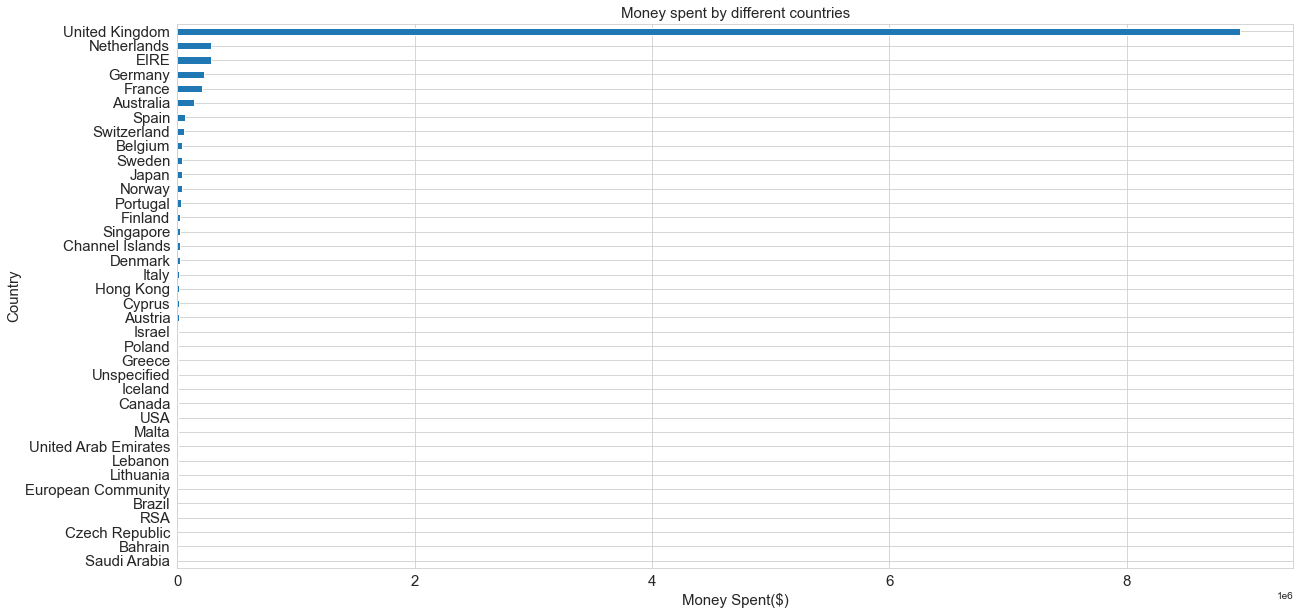

In [109]:
country_amt_spent = df.groupby('Country')['Amount_Spent'].sum().sort_values()

plt.subplots(figsize=(20,10))
country_amt_spent.plot(kind='barh',fontsize=15)
plt.xlabel('Money Spent($)',fontsize=15)
plt.ylabel('Country',fontsize=15)
plt.title('Money spent by different countries',fontsize=15)
plt.show()